In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import umap.umap_ as umap
from sklearn.metrics import accuracy_score

In [5]:
df_data = pd.read_csv('../data/train.csv')
df_data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


#  Génération des données d'entrainement et de test

In [6]:
X = df_data.copy().drop(['id', 'species'],axis='columns').values

species = df_data['species'].unique()

# Création des vecteurs one-hot pour la matrice de targets
t = np.zeros(df_data.shape[0]) 
for i in range(species.size):
    t[df_data['species'] == species[i]] = i

In [7]:
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.,  4., 21., 22., 23., 24.,
       25., 26., 25., 15., 27., 28.,  3., 29., 30., 31., 32., 33., 34.,
       35.,  4.,  2., 36., 14., 37., 38., 39., 40.,  6., 41., 42., 43.,
       44., 45., 20., 27., 14., 32., 45., 34., 46., 29., 47., 48., 49.,
       50., 34., 51., 17.,  4., 27., 52., 53., 35., 54., 53., 40., 13.,
        6., 55., 56., 39., 43., 57., 58., 59., 60., 34., 61., 62., 63.,
       62., 64., 62., 41., 65., 34., 49., 66., 11., 51.,  6., 67., 68.,
       69., 63.,  4., 38., 23., 68., 23., 70., 36., 17., 56., 56.,  3.,
       27., 71., 46., 72., 73., 74., 52., 33., 75., 70., 76., 47., 77.,
       62., 78., 79., 67., 64., 77., 32., 56., 18., 45., 12., 61., 34.,
       59., 41.,  5., 35., 15., 20., 13., 54., 80., 81., 22., 62., 16.,
       82., 37.,  2.,  4., 75., 69., 65., 11., 72., 31., 30., 83., 19.,
       38., 66., 18., 84., 75., 80., 82., 81., 57., 30., 46.,  0

In [8]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [9]:
print("size X_train: "+str(X_train.shape))
print("size t_train: "+str(t_train.shape))
print()
print("size X_test: "+str(X_test.shape))
print("size t_test: "+str(t_test.shape))

size X_train: (693, 192)
size t_train: (693,)

size X_test: (297, 192)
size t_test: (297,)


# Visualisation des données

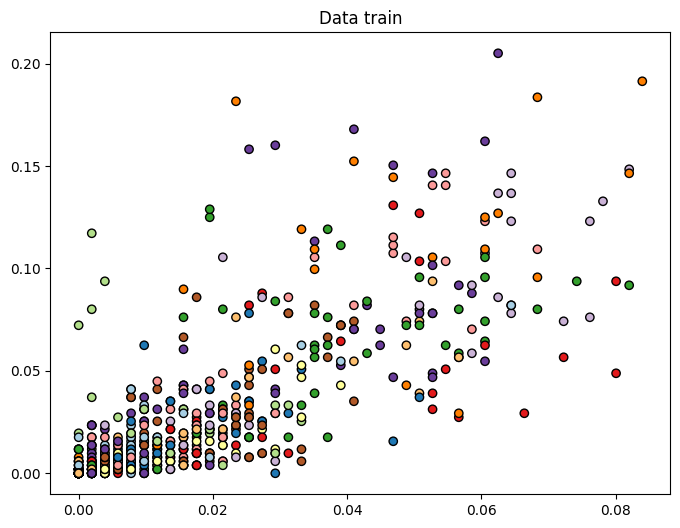

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Data train')
plt.show()

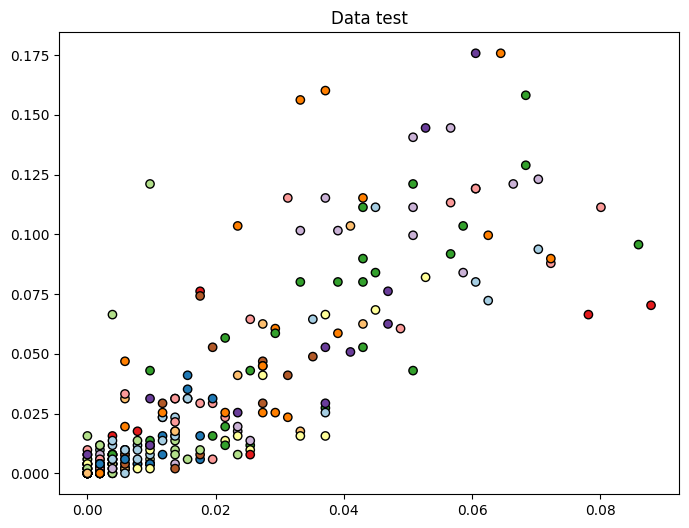

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=t_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Data test')
plt.show()

In [12]:
X_train

array([[0.015625, 0.017578, 0.005859, ..., 0.      , 0.007812, 0.025391],
       [0.015625, 0.019531, 0.035156, ..., 0.005859, 0.021484, 0.006836],
       [0.      , 0.      , 0.013672, ..., 0.17676 , 0.      , 0.      ],
       ...,
       [0.048828, 0.10547 , 0.015625, ..., 0.015625, 0.      , 0.0625  ],
       [0.      , 0.      , 0.009766, ..., 0.05957 , 0.001953, 0.006836],
       [0.      , 0.      , 0.083984, ..., 0.010742, 0.017578, 0.027344]])

# Entrainement du modèle

In [13]:
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, t_train)
model.score(X_train, t_train)

0.2972582972582973

Nous voyons que la précision est très peu élevée, nous cherchons donc grâce à la GridSearch sur les différents solver et les différentes valeurs de C qui représente l'inverse de la force de régularisation

In [18]:
from sklearn.model_selection import GridSearchCV

# Paramètre à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # C'est l'inverse de la force de régularisation
}

# Création du modèle de recherche sur grille
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000), param_grid, cv=5, verbose=0, n_jobs=-1)

# Entraînement du modèle avec la recherche sur grille
grid_search.fit(X_train, t_train)

# Meilleurs paramètres et meilleure précision
print("Meilleur paramètre:", grid_search.best_params_)
print("Meilleure précision:", grid_search.best_score_)

C:\Users\thoma\Documents\TechniqueApprentissage\technique_apprentissage_projet\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Meilleur paramètre: {'C': 100}
Meilleure précision: 0.8975706391408613


In [19]:
model = LogisticRegression(multi_class='multinomial',max_iter=1000, C=100, n_jobs=-1)
model.fit(X_train,t_train)
model.score(X_train,t_train)

1.0

# Test du modèle 

In [16]:
model.score(X_test,t_test)

0.8619528619528619

# Visualisation de notre apprentissage

Précision du modèle sur l'ensemble d'entraînement : 1.00


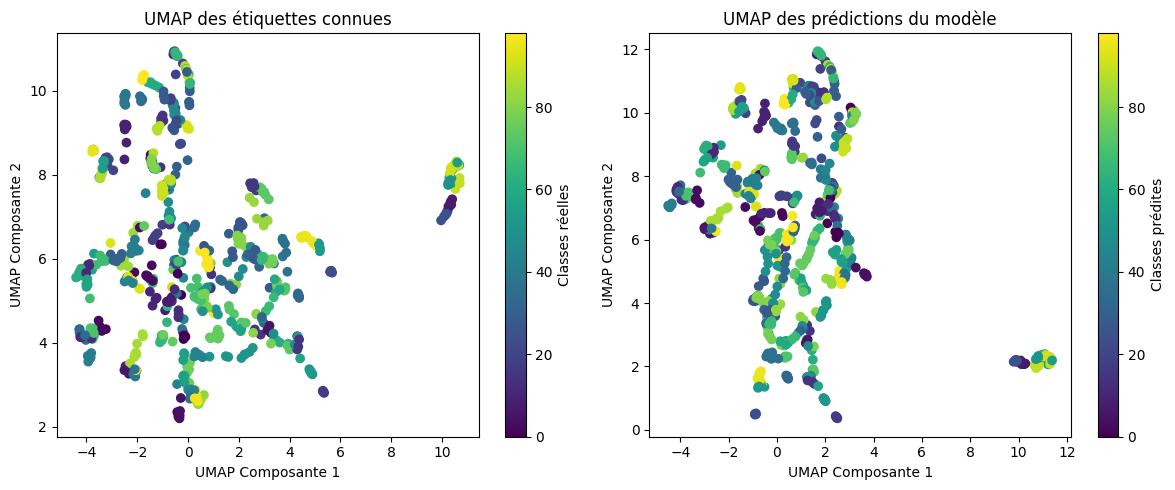

In [17]:
# Réduire la dimensionnalité à 2 avec UMAP pour les étiquettes connues
umap_model_labels = umap.UMAP(n_components=2)
X_train_umap_labels = umap_model_labels.fit_transform(X_train)

# Prédire les classes pour l'ensemble de train
t_pred = model.predict(X_train)
accuracy = accuracy_score(t_train, t_pred)
print(f"Précision du modèle sur l'ensemble d'entraînement : {accuracy:.2f}")

umap_model_predictions = umap.UMAP(n_components=2)
X_train_umap_predictions = umap_model_predictions.fit_transform(X_train)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter_umap_labels = plt.scatter(X_train_umap_labels[:, 0], X_train_umap_labels[:, 1], c=t_train, cmap='viridis')
plt.title('UMAP des étiquettes connues')
plt.xlabel('UMAP Composante 1')
plt.ylabel('UMAP Composante 2')
plt.colorbar(scatter_umap_labels, label='Classes réelles')

plt.subplot(1, 2, 2)
scatter_umap_predictions = plt.scatter(X_train_umap_predictions[:, 0], X_train_umap_predictions[:, 1], c=t_pred, cmap='viridis')
plt.title('UMAP des prédictions du modèle')
plt.xlabel('UMAP Composante 1')
plt.ylabel('UMAP Composante 2')
plt.colorbar(scatter_umap_predictions, label='Classes prédites')

plt.tight_layout()
plt.show()